In [41]:
import pandas as pd
import src.helping_functions as hf
import matplotlib.pyplot as plt

Content

I have data about past and current employees in a spreadsheet on my desk top. It has various data points on our employees, but I’m most interested in whether they’re still with my company or whether they’ve gone to work somewhere else. And I want to understand how this relates to workforce attrition.

Education 
1 'Below College' 2 'College' 3 'Bachelor' 4 'Master' 5 'Doctor'

EnvironmentSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobInvolvement 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

JobSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

PerformanceRating
1 'Low' 2 'Good' 3 'Excellent' 4 'Outstanding'

RelationshipSatisfaction 
1 'Low' 2 'Medium' 3 'High' 4 'Very High'

WorkLifeBalance 
1 'Bad' 2 'Good' 3 'Better' 4 'Best'

## Load and prepare data

In [6]:
df1 = pd.read_csv("../data/raw/df1.csv", index_col=0)
df1.head()

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
EmployeeNumber,,,,,,,,,,,,,,,,,,,
104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0
164,26.0,Travel_Rarely,841.0,Research & Development,6.0,3.0,Other,1.0,3.0,Female,46.0,2.0,1.0,Research Scientist,2.0,Married,2368.0,23300.0,1.0
395,28.0,Travel_Rarely,1117.0,Research & Development,8.0,2.0,Life Sciences,1.0,4.0,Female,66.0,3.0,1.0,Research Scientist,4.0,Single,3310.0,4488.0,1.0
53,35.0,Travel_Rarely,464.0,Research & Development,4.0,2.0,Other,1.0,3.0,Male,75.0,3.0,1.0,Laboratory Technician,4.0,Divorced,1951.0,10910.0,1.0


In [7]:
df1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,416.187458,801.017982,33339.433356,2.909867,1.0,2.719263,65.977073,2.739492,2.053495,2.724882,6468.496067,14276.196898,2.681726
std,1566.205147,405.605362,145352.131423,1.025184,0.0,1.093263,20.277369,0.712660,1.102979,1.107453,4682.905422,7149.079135,2.487077
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000
25%,31.000000,458.000000,2.000000,2.000000,1.0,2.000000,48.000000,2.000000,1.000000,2.000000,2899.000000,7973.000000,1.000000
50%,36.000000,804.000000,8.000000,3.000000,1.0,3.000000,66.000000,3.000000,2.000000,3.000000,4876.000000,14218.000000,2.000000
75%,45.000000,1162.000000,17.000000,4.000000,1.0,4.000000,84.000000,3.000000,3.000000,4.000000,8346.000000,20471.000000,4.000000
max,9890.000000,1499.000000,999590.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000


In [8]:
# columns to drop
to_drop = ["EmployeeCount"]
to_int = ["Age", "DailyRate", "DistanceFromHome", "HourlyRate", "MonthlyIncome", "MonthlyRate", "NumCompaniesWorked"] 
to_category = ["BusinessTravel", "Department", "EducationField", "Gender", "JobRole", "MaritalStatus", 
    "Education", "EnvironmentSatisfaction", "JobInvolvement", "JobLevel", "JobSatisfaction"]

hf.clean_dataframe(df1, to_drop, to_int, to_category)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 104 to 7979
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Age                      4449 non-null   int64   
 1   BusinessTravel           4449 non-null   category
 2   DailyRate                4449 non-null   int64   
 3   Department               4449 non-null   category
 4   DistanceFromHome         4449 non-null   int64   
 5   Education                4449 non-null   category
 6   EducationField           4449 non-null   category
 7   EnvironmentSatisfaction  4449 non-null   category
 8   Gender                   4449 non-null   category
 9   HourlyRate               4449 non-null   int64   
 10  JobInvolvement           4449 non-null   category
 11  JobLevel                 4449 non-null   category
 12  JobRole                  4449 non-null   category
 13  JobSatisfaction          4449 non-null   category
 14  Marita

In [10]:
df2 = pd.read_csv("../data/raw/df2.csv", index_col=0)
df2.head()

,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
EmployeeNumber,,,,,,,,,,,,,,,,
104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0
164,Y,No,19.0,3.0,3.0,80.0,0.0,5.0,3.0,2.0,5.0,4.0,4.0,3.0,No,28416.0
395,Y,No,21.0,4.0,4.0,80.0,0.0,5.0,3.0,3.0,5.0,3.0,0.0,2.0,No,39720.0
53,Y,No,12.0,3.0,3.0,80.0,1.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0,No,23412.0


In [11]:
df2.describe()

,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,15.187683,3.148573,2.725556,80.0,0.785795,342.691616,2.808946,2.764217,302.743313,355.125646,385.886716,323.842886,77621.952798
std,3.642842,0.355707,1.080807,0.0,0.848038,1484.151875,1.306080,0.710859,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,18.000000,3.000000,4.000000,80.0,1.000000,17.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,25.000000,4.000000,4.000000,80.0,3.000000,9939.000000,6.000000,4.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


In [12]:
# columns to drop
to_drop = ["Over18"]
to_int = ["PercentSalaryHike", "StandardHours", "TotalWorkingYears", "TrainingTimesLastYear", "YearsAtCompany", 
    "YearsInCurrentRole", "YearsSinceLastPromotion", "YearsWithCurrManager", "YearlyIncome"] 
to_category = ["OverTime", "Attrition", "PerformanceRating", "RelationshipSatisfaction", "StockOptionLevel", "WorkLifeBalance"]

hf.clean_dataframe(df2, to_drop, to_int, to_category)

df2["Attrition"] = df2["Attrition"].replace(["No", "Yes"], [0, 1])

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4449 entries, 104 to 7979
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   OverTime                  4449 non-null   category
 1   PercentSalaryHike         4449 non-null   int64   
 2   PerformanceRating         4449 non-null   category
 3   RelationshipSatisfaction  4449 non-null   category
 4   StandardHours             4449 non-null   int64   
 5   StockOptionLevel          4449 non-null   category
 6   TotalWorkingYears         4449 non-null   int64   
 7   TrainingTimesLastYear     4449 non-null   int64   
 8   WorkLifeBalance           4449 non-null   category
 9   YearsAtCompany            4449 non-null   int64   
 10  YearsInCurrentRole        4449 non-null   int64   
 11  YearsSinceLastPromotion   4449 non-null   int64   
 12  YearsWithCurrManager      4449 non-null   int64   
 13  Attrition                 4302 non-null   cate

In [14]:
full_df = pd.concat([df1, df2], axis=1)
# full_df.to_csv("../data/processed/full_df.csv")
full_df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
104,30,Travel_Rarely,852,Research & Development,1,1.0,Life Sciences,4.0,Male,55,...,2.0,10,1,2.0,10,8,3,0,No,61512
1638,38,Travel_Rarely,397,Research & Development,2,2.0,Medical,4.0,Female,54,...,1.0,10,6,4.0,5,4,0,2,No,93072
164,26,Travel_Rarely,841,Research & Development,6,3.0,Other,3.0,Female,46,...,0.0,5,3,2.0,5,4,4,3,No,28416
395,28,Travel_Rarely,1117,Research & Development,8,2.0,Life Sciences,4.0,Female,66,...,0.0,5,3,3.0,5,3,0,2,No,39720
53,35,Travel_Rarely,464,Research & Development,4,2.0,Other,3.0,Male,75,...,1.0,1,3,3.0,1,0,0,0,No,23412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7975,8823,Travel_Rarely,621,Research & Development,15,3.0,Medical,1.0,Female,73,...,1.0,10,2,3.0,10,7,0,5,Yes,95736
7976,8823,Travel_Rarely,621,Research & Development,15,3.0,Medical,1.0,Female,73,...,1.0,10,2,3.0,10,7,0,5,Yes,95736
7977,44,Non-Travel,381,Research & Development,918785,3.0,Medical,1.0,Male,49,...,0.0,9,5,3.0,5,2,1,4,Yes,44496


In [15]:
full_df.describe()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,StandardHours,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,YearlyIncome
count,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.0,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000,4449.000000
mean,416.187458,801.017982,33339.433356,65.977073,6468.496067,14276.196898,2.681726,15.187683,80.0,342.691616,2.808946,302.743313,355.125646,385.886716,323.842886,77621.952798
std,1566.205147,405.605362,145352.131423,20.277369,4682.905422,7149.079135,2.487077,3.642842,0.0,1484.151875,1.306080,1352.211854,1456.887417,1572.914217,1409.370519,56194.865060
min,18.000000,102.000000,1.000000,30.000000,1009.000000,2094.000000,0.000000,11.000000,80.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12108.000000
25%,31.000000,458.000000,2.000000,48.000000,2899.000000,7973.000000,1.000000,12.000000,80.0,6.000000,2.000000,3.000000,2.000000,0.000000,2.000000,34788.000000
50%,36.000000,804.000000,8.000000,66.000000,4876.000000,14218.000000,2.000000,14.000000,80.0,10.000000,3.000000,5.000000,3.000000,1.000000,3.000000,58512.000000
75%,45.000000,1162.000000,17.000000,84.000000,8346.000000,20471.000000,4.000000,18.000000,80.0,17.000000,3.000000,10.000000,7.000000,4.000000,7.000000,100152.000000
max,9890.000000,1499.000000,999590.000000,100.000000,19999.000000,26999.000000,9.000000,25.000000,80.0,9939.000000,6.000000,9984.000000,9937.000000,9990.000000,9882.000000,239988.000000


columns:  
- Age
- DistanceFromHome
- TotalWorkingYears
- YearsAtCompany
- YearsCurrentRole
- YearsSinceLastPromotion
- YearsWithCurrManager

needs some additional work

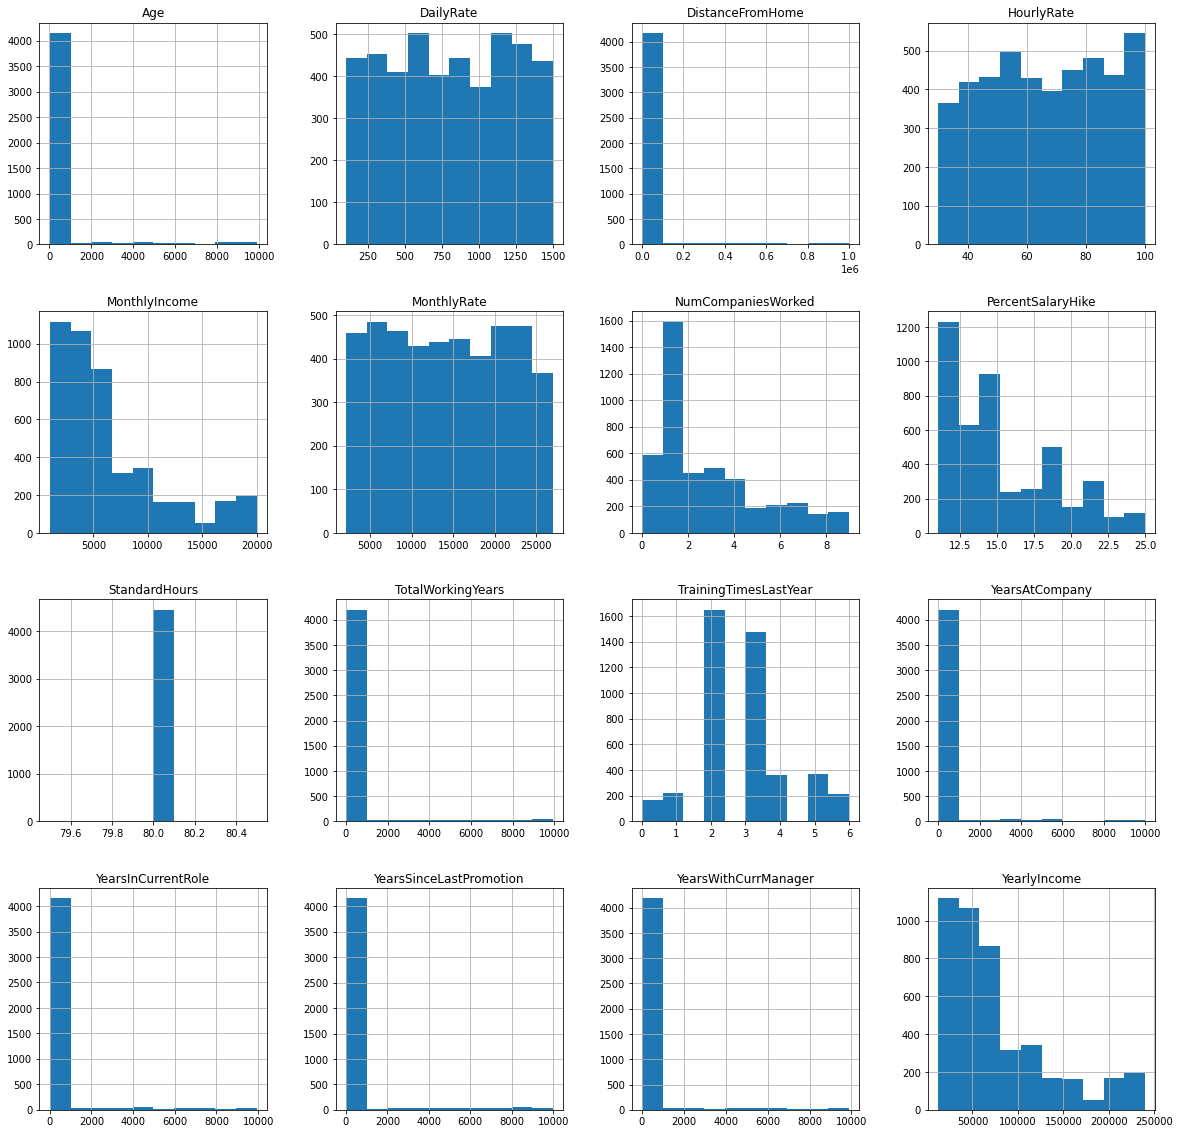

In [24]:
full_df.hist(figsize=(20,20))
plt.show()

In [40]:
full_df[full_df["YearsInCurrentRole"] > 100]

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
EmployeeNumber,,,,,,,,,,,,,,,,,,,,,
5039,53,Travel_Rarely,1282,Research & Development,5,3.0,Other,3.0,Female,58,...,1.0,26,3,2.0,14,3099,4,8,Yes,229128
5040,53,Travel_Rarely,1282,Research & Development,5,3.0,Other,3.0,Female,58,...,1.0,26,3,2.0,14,3099,4,8,Yes,229128
5065,38,Travel_Frequently,471,Research & Development,12,3.0,Life Sciences,1.0,Male,45,...,1.0,13,3,2.0,4,3591,1,2,No,75456
5071,38,Travel_Rarely,130,Sales,2,2.0,Marketing,4.0,Male,32,...,0.0,10,2,3.0,1,6908,0,0,Yes,88212
5072,38,Travel_Rarely,130,Sales,2,2.0,Marketing,4.0,Male,32,...,0.0,10,2,3.0,1,6908,0,0,No,88212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7966,35,Non-Travel,208,Research & Development,8,4.0,Life Sciences,3.0,Female,52,...,1.0,15,5,3.0,14,6755,2,9,Yes,49776
7967,35,Non-Travel,208,Research & Development,8,4.0,Life Sciences,3.0,Female,52,...,1.0,15,5,3.0,14,6755,2,9,No,49776
7968,35,Non-Travel,208,Research & Development,8,4.0,Life Sciences,3.0,Female,52,...,1.0,15,5,3.0,14,6755,2,9,Yes,49776
